# crypto_analysis

## DATA

In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import matplotlib.pyplot as pltimport 
import yfinance as yf
import plotly.graph_objects as go



In [2]:
def get_ohlcv_yf(ticker, start="2019-06-18", end=None, interval="1d"):
    """
    Récupère les données OHLCV pour un ticker sur une période donnée (par défaut 5 ans).
    """
    df = yf.download(
        tickers=ticker,
        start=start,
        end=end,
        interval=interval,
        auto_adjust=True,
        progress=False,
    )
    df = df.dropna()
    return df



In [3]:
btc = get_ohlcv_yf('BTC-USD', start='2019-06-18', interval='1d')
eth = get_ohlcv_yf('ETH-USD', start='2019-06-18', interval='1d')

display(btc.head())
display(eth.head())
print("BTC shape:", btc.shape)
print("ETH shape:", eth.shape)


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2019-06-18,9081.762695,9348.374023,9004.901367,9335.466797,15848210536
2019-06-19,9273.521484,9299.621094,9070.395508,9078.727539,15546809946
2019-06-20,9527.160156,9594.419922,9232.484375,9273.060547,17846823784
2019-06-21,10144.556641,10144.556641,9525.074219,9525.074219,20624008643
2019-06-22,10701.691406,11157.345703,10107.035156,10175.923828,29995204861


Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,
2019-06-18,265.051849,274.320251,263.144440,274.320251,6205242504
2019-06-19,269.431793,270.333374,264.754791,265.056854,5516510947
2019-06-20,271.695007,274.073517,265.500458,269.407867,6408981097
2019-06-21,294.910278,295.303314,271.743103,271.743103,9331694140
2019-06-22,309.380310,315.189728,294.728241,295.115082,10613731255


BTC shape: (2195, 5)
ETH shape: (2195, 5)


In [4]:
# On reconcatène les niveaux du MultiIndex
btc.columns = [f"{col[0]}_{col[1]}" for col in btc.columns]
print(btc.columns)



Index(['Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD',
       'Volume_BTC-USD'],
      dtype='object')


In [5]:
def add_log_return(df, ticker):
    col = f'Close_{ticker}'
    df[f'LOGRET_1D_{ticker}'] = np.log(df[col]).diff().shift(-1)
    return df


In [6]:
btc = add_log_return(btc, 'BTC-USD')



In [7]:
print(btc.columns)
print(btc.head())


Index(['Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD',
       'Volume_BTC-USD', 'LOGRET_1D_BTC-USD'],
      dtype='object')
            Close_BTC-USD  High_BTC-USD   Low_BTC-USD  Open_BTC-USD  \
Date                                                                  
2019-06-18    9081.762695   9348.374023   9004.901367   9335.466797   
2019-06-19    9273.521484   9299.621094   9070.395508   9078.727539   
2019-06-20    9527.160156   9594.419922   9232.484375   9273.060547   
2019-06-21   10144.556641  10144.556641   9525.074219   9525.074219   
2019-06-22   10701.691406  11157.345703  10107.035156  10175.923828   

            Volume_BTC-USD  LOGRET_1D_BTC-USD  
Date                                           
2019-06-18     15848210536           0.020895  
2019-06-19     15546809946           0.026983  
2019-06-20     17846823784           0.062791  
2019-06-21     20624008643           0.053465  
2019-06-22     29995204861           0.014258  


In [8]:
eth.columns = [f"{col[0]}_{col[1]}" for col in eth.columns]
print(eth.columns)

Index(['Close_ETH-USD', 'High_ETH-USD', 'Low_ETH-USD', 'Open_ETH-USD',
       'Volume_ETH-USD'],
      dtype='object')


In [9]:
eth = add_log_return(eth, 'ETH-USD')

In [10]:
print(eth.columns)
print(eth.head())

Index(['Close_ETH-USD', 'High_ETH-USD', 'Low_ETH-USD', 'Open_ETH-USD',
       'Volume_ETH-USD', 'LOGRET_1D_ETH-USD'],
      dtype='object')
            Close_ETH-USD  High_ETH-USD  Low_ETH-USD  Open_ETH-USD  \
Date                                                                 
2019-06-18     265.051849    274.320251   263.144440    274.320251   
2019-06-19     269.431793    270.333374   264.754791    265.056854   
2019-06-20     271.695007    274.073517   265.500458    269.407867   
2019-06-21     294.910278    295.303314   271.743103    271.743103   
2019-06-22     309.380310    315.189728   294.728241    295.115082   

            Volume_ETH-USD  LOGRET_1D_ETH-USD  
Date                                           
2019-06-18      6205242504           0.016390  
2019-06-19      5516510947           0.008365  
2019-06-20      6408981097           0.081991  
2019-06-21      9331694140           0.047900  
2019-06-22     10613731255          -0.005031  


In [11]:
import plotly.graph_objects as go

# --- BTC ---
fig_btc = go.Figure()
fig_btc.add_trace(
    go.Scatter(
        x=btc.index,
        y=btc['Close_BTC-USD'],
        mode='lines',
        name='BTC Close',
        line=dict(color='blue')
    )
)
fig_btc.update_layout(
    title='Prix de clôture BTC (USD) - 5 ans',
    xaxis_title='Date',
    yaxis_title='Prix de clôture (USD)',
    template='plotly_white'
)
fig_btc.show()

# --- ETH ---
fig_eth = go.Figure()
fig_eth.add_trace(
    go.Scatter(
        x=eth.index,
        y=eth['Close_ETH-USD'],
        mode='lines',
        name='ETH Close',
        line=dict(color='orange')
    )
)
fig_eth.update_layout(
    title='Prix de clôture ETH (USD) - 5 ans',
    xaxis_title='Date',
    yaxis_title='Prix de clôture (USD)',
    template='plotly_white'
)
fig_eth.show()



## indicateur technique

In [12]:
import ta

def add_rsi(df, ticker, window=14):
    col = f'Close_{ticker}'
    df[f'RSI_{window}'] = ta.momentum.rsi(df[col], window=window)
    return df

def add_macd(df, ticker):
    col = f'Close_{ticker}'
    macd_ind = ta.trend.MACD(df[col])
    df['MACD'] = macd_ind.macd()
    df['MACD_signal'] = macd_ind.macd_signal()
    df['MACD_diff'] = macd_ind.macd_diff()
    return df

def add_sma(df, ticker, window=50):
    col = f'Close_{ticker}'
    df[f'SMA_{window}'] = df[col].rolling(window=window).mean()
    return df

def add_ema(df, ticker, window=21):
    col = f'Close_{ticker}'
    df[f'EMA_{window}'] = df[col].ewm(span=window, adjust=False).mean()
    return df

def add_bollinger_bands(df, ticker, window=20, n_std=2):
    col = f'Close_{ticker}'
    rolling_mean = df[col].rolling(window=window).mean()
    rolling_std = df[col].rolling(window=window).std()
    df[f'BOLL_MID_{window}'] = rolling_mean
    df[f'BOLL_UP_{window}'] = rolling_mean + (rolling_std * n_std)
    df[f'BOLL_LOW_{window}'] = rolling_mean - (rolling_std * n_std)
    return df

def add_all_indicators(df, ticker):
    df = add_rsi(df, ticker, window=14)
    df = add_macd(df, ticker)
    df = add_sma(df, ticker, window=50)
    df = add_sma(df, ticker, window=200)
    df = add_ema(df, ticker, window=21)
    df = add_bollinger_bands(df, ticker, window=20)
    return df


In [13]:

btc = add_all_indicators(btc, 'BTC-USD')


eth = add_all_indicators(eth, 'ETH-USD')

display(btc.tail())
display(eth.tail())


,Close_BTC-USD,High_BTC-USD,Low_BTC-USD,Open_BTC-USD,Volume_BTC-USD,LOGRET_1D_BTC-USD,RSI_14,MACD,MACD_signal,MACD_diff,SMA_50,SMA_200,EMA_21,BOLL_MID_20,BOLL_UP_20,BOLL_LOW_20
Date,,,,,,,,,,,,,,,,
2025-06-16,106796.757812,108915.375000,104997.625000,105555.593750,50366626945,-0.020773,53.551879,740.044285,1046.097556,-306.053271,103892.072813,95744.848789,106096.452907,106011.678906,110078.528576,101944.829237
2025-06-17,104601.117188,107750.195312,103396.531250,106794.117188,55964092176,0.002694,47.350426,538.543795,944.586804,-406.043009,104084.520156,95780.546758,105960.513296,105851.618359,109873.463623,101829.773096
2025-06-18,104883.328125,105581.851562,103602.265625,104602.070312,47318089133,-0.001900,48.181050,397.048343,835.079112,-438.030769,104296.490937,95822.718125,105862.587372,105813.696875,109858.112662,101769.281088
2025-06-19,104684.289062,105250.890625,103940.773438,104886.773438,37333806920,-0.013356,47.610542,265.787555,721.220800,-455.433245,104506.030469,95859.740625,105755.469343,105847.982813,109838.881342,101857.084283
2025-06-20,103295.414062,106461.671875,102480.875000,104677.554688,49992867840,NaN,43.720285,49.125541,586.801748,-537.676207,104642.092031,95896.891172,105531.827954,105780.848828,109900.536446,101661.161210


,Close_ETH-USD,High_ETH-USD,Low_ETH-USD,Open_ETH-USD,Volume_ETH-USD,LOGRET_1D_ETH-USD,RSI_14,MACD,MACD_signal,MACD_diff,SMA_50,SMA_200,EMA_21,BOLL_MID_20,BOLL_UP_20,BOLL_LOW_20
Date,,,,,,,,,,,,,,,,
2025-06-16,2540.604980,2680.087646,2517.145264,2547.226807,22792449577,-0.011816,49.926132,42.026670,64.839899,-22.813229,2410.551360,2631.940695,2568.722085,2588.534509,2782.002493,2395.066526
2025-06-17,2510.761475,2617.901367,2456.648926,2540.314453,25653232897,0.005378,48.094462,32.693061,58.410531,-25.717470,2424.789553,2626.527031,2563.452939,2579.961938,2771.132881,2388.790996
2025-06-18,2524.301514,2546.627441,2469.050293,2510.816895,19873957905,-0.001050,49.008516,26.087951,51.946015,-25.858064,2439.292070,2620.620012,2559.893718,2574.544275,2765.568985,2383.519565
2025-06-19,2521.653564,2546.769531,2486.101807,2524.404053,12782730709,-0.049018,48.827425,20.404477,45.637707,-25.233231,2453.849634,2614.672454,2556.417341,2574.129773,2765.597434,2382.662112
2025-06-20,2401.028564,2565.731689,2382.908691,2521.525879,22453149696,NaN,41.334524,6.096575,37.729481,-31.632906,2465.085774,2608.456605,2542.291088,2567.726831,2773.562545,2361.891117


In [14]:


def plot_candlestick_with_volume(df, ticker):
    fig = go.Figure()
    fig.add_trace(go.Candlestick(
        x=df.index,
        open=df[f'Open_{ticker}'],
        high=df[f'High_{ticker}'],
        low=df[f'Low_{ticker}'],
        close=df[f'Close_{ticker}'],
        name='Bougies'
    ))
    fig.add_trace(go.Bar(
        x=df.index,
        y=df[f'Volume_{ticker}'],
        name='Volume',
        marker_color='lightblue',
        yaxis='y2',
        opacity=0.2
    ))
    # Double axe Y
    fig.update_layout(
        title=f'Candlestick & Volume - {ticker}',
        xaxis_title='Date',
        yaxis_title='Prix (USD)',
        yaxis2=dict(
            title='Volume',
            overlaying='y',
            side='right',
            showgrid=False
        ),
        xaxis_rangeslider_visible=False,
        template='plotly_white',
        legend=dict(orientation="h")
    )
    fig.show()


In [15]:
def plot_close_and_ma(df, ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df[f'Close_{ticker}'], mode='lines', name='Close'))
    if f'SMA_50' in df.columns:
        fig.add_trace(go.Scatter(x=df.index, y=df['SMA_50'], mode='lines', name='SMA 50', line=dict(dash='dash')))
    if f'SMA_200' in df.columns:
        fig.add_trace(go.Scatter(x=df.index, y=df['SMA_200'], mode='lines', name='SMA 200', line=dict(dash='dot')))
    if f'EMA_21' in df.columns:
        fig.add_trace(go.Scatter(x=df.index, y=df['EMA_21'], mode='lines', name='EMA 21', line=dict(dash='dashdot')))
    fig.update_layout(
        title=f'Close & Moving Averages - {ticker}',
        xaxis_title='Date',
        yaxis_title='Prix (USD)',
        template='plotly_white'
    )
    fig.show()


In [16]:
def plot_rsi(df, ticker, window=14):
    col = f'RSI_{window}'
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df[col], mode='lines', name=f'RSI {window}'))
    fig.add_hline(y=70, line=dict(color='red', dash='dash'), annotation_text="Overbought")
    fig.add_hline(y=30, line=dict(color='green', dash='dash'), annotation_text="Oversold")
    fig.update_layout(
        title=f'RSI {window} - {ticker}',
        xaxis_title='Date',
        yaxis_title='RSI'
    )
    fig.show()


In [17]:
def plot_macd(df, ticker):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['MACD'], mode='lines', name='MACD'))
    fig.add_trace(go.Scatter(x=df.index, y=df['MACD_signal'], mode='lines', name='Signal'))
    fig.add_trace(go.Bar(x=df.index, y=df['MACD_diff'], name='MACD diff', marker_color='gray', opacity=0.2))
    fig.update_layout(
        title=f'MACD & Signal - {ticker}',
        xaxis_title='Date',
        yaxis_title='MACD',
        template='plotly_white'
    )
    fig.show()


In [18]:
def plot_bollinger_bands(df, ticker, window=20):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df[f'Close_{ticker}'], mode='lines', name='Close'))
    fig.add_trace(go.Scatter(x=df.index, y=df[f'BOLL_MID_{window}'], mode='lines', name='Bollinger Mid', line=dict(dash='dash')))
    fig.add_trace(go.Scatter(x=df.index, y=df[f'BOLL_UP_{window}'], mode='lines', name='Bollinger Upper', line=dict(dash='dot')))
    fig.add_trace(go.Scatter(x=df.index, y=df[f'BOLL_LOW_{window}'], mode='lines', name='Bollinger Lower', line=dict(dash='dot')))
    fig.update_layout(
        title=f'Bollinger Bands ({window}) - {ticker}',
        xaxis_title='Date',
        yaxis_title='Prix (USD)',
        template='plotly_white'
    )
    fig.show()


In [19]:
plot_candlestick_with_volume(btc, 'BTC-USD')
plot_close_and_ma(btc, 'BTC-USD')
plot_rsi(btc, 'BTC-USD')
plot_macd(btc, 'BTC-USD')
plot_bollinger_bands(btc, 'BTC-USD')



## pretraitement des données

In [20]:

from sklearn.preprocessing import StandardScaler

def dropna_crypto(df, ticker, indic_cols=None):
    """
    Drop NA selon des colonnes clefs d’indicateurs (ex : Close, RSI, MACD, Bollinger…)
    """
    if indic_cols is None:
        indic_cols = [
            f'Close_{ticker}', 'RSI_14', 'MACD', 'MACD_signal', 'SMA_50', 'SMA_200', 'EMA_21',
            f'BOLL_MID_20', f'BOLL_UP_20', f'BOLL_LOW_20'
        ]
    return df.dropna(subset=indic_cols).copy()

def add_returns(df, ticker):
    col = f'Close_{ticker}'
    df[f'RET_1D_{ticker}'] = df[col].pct_change().shift(-1)
    df[f'LOGRET_1D_{ticker}'] = np.log(df[col]).diff().shift(-1)
    return df

def add_rolling_vol(df, ticker, window=14):
    ret_col = f'RET_1D_{ticker}'
    df[f'VOLAT_{window}D_{ticker}'] = df[ret_col].rolling(window=window).std() * np.sqrt(365)
    return df

def add_zscore(df, ticker, quant_cols=None):
    """
    Standardise toutes les colonnes quantitatives, y compris les bandes de Bollinger.
    """
    if quant_cols is None:
        quant_cols = [
            'RSI_14', 'MACD', 'MACD_signal', 'SMA_50', 'SMA_200', 'EMA_21',
            f'BOLL_MID_20', f'BOLL_UP_20', f'BOLL_LOW_20',
            f'RET_1D_{ticker}', f'LOGRET_1D_{ticker}', f'VOLAT_14D_{ticker}'
        ]
    scaler = StandardScaler()
    cols_in_df = [c for c in quant_cols if c in df.columns]
    df[[f'Z_{c}' for c in cols_in_df]] = scaler.fit_transform(df[cols_in_df])
    return df

def full_preprocess(df, ticker):
    df = dropna_crypto(df, ticker)
    df = add_returns(df, ticker)
    df = add_rolling_vol(df, ticker, window=14)
    df = add_zscore(df, ticker)
    return df


In [21]:
btc_clean = full_preprocess(btc, 'BTC-USD')
eth_clean = full_preprocess(eth, 'ETH-USD')


In [22]:
btc_clean.head()

,Close_BTC-USD,High_BTC-USD,Low_BTC-USD,Open_BTC-USD,Volume_BTC-USD,LOGRET_1D_BTC-USD,RSI_14,MACD,MACD_signal,MACD_diff,...,Z_MACD_signal,Z_SMA_50,Z_SMA_200,Z_EMA_21,Z_BOLL_MID_20,Z_BOLL_UP_20,Z_BOLL_LOW_20,Z_RET_1D_BTC-USD,Z_LOGRET_1D_BTC-USD,Z_VOLAT_14D_BTC-USD
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,0.008915,50.861059,-63.736941,-79.962429,16.225488,...,-0.269476,-1.303108,-1.248940,-1.307454,-1.305759,-1.342066,-1.250635,0.215240,0.227399,NaN
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,0.000089,52.642166,-45.674864,-73.104916,27.430051,...,-0.265097,-1.303968,-1.249316,-1.306974,-1.305259,-1.341313,-1.250433,-0.054350,-0.037030,NaN
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,0.047161,52.660727,-30.950453,-64.674023,33.723570,...,-0.259715,-1.304874,-1.249735,-1.306535,-1.304332,-1.341140,-1.248639,1.411389,1.373290,NaN
2020-01-06,7769.219238,7781.867188,7409.292969,7410.452148,23276261598,0.049527,61.470694,9.489054,-49.841408,59.330462,...,-0.250244,-1.305517,-1.250131,-1.304871,-1.302148,-1.341091,-1.243993,1.486880,1.444160,NaN
2020-01-07,8163.692383,8178.215820,7768.227539,7768.682129,28767291327,-0.010322,68.441819,72.532234,-25.366679,97.898914,...,-0.234618,-1.305633,-1.250577,-1.301966,-1.300431,-1.333059,-1.249636,-0.369310,-0.348946,NaN


## modelisation regression

### BTC

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [24]:
btc_reg = btc_clean.copy()
btc_reg.index = pd.DatetimeIndex(btc_reg.index)
btc_reg = btc_reg.asfreq('D')
btc_reg['TARGET'] = btc_reg['Close_BTC-USD'].shift(-1)




In [25]:
# Définition des features (Z-score)
features = [col for col in btc_reg.columns if col.startswith('Z_')]
# Liste complète des colonnes à garder sans NaN
all_cols = features + ['TARGET']
btc_reg = btc_reg.dropna(subset=all_cols)


In [26]:
# Train/test split
split = int(0.8 * len(btc_reg))
train = btc_reg.iloc[:split]
test = btc_reg.iloc[split:]


In [27]:
# Variables pour SARIMAX
endog = train['TARGET']   # prix J+1
exog = train[features]    # indicateurs

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def reduce_vif(X_df, thresh=10.0, verbose=True):
    """
    Retire itérativement la variable avec le plus grand VIF (>thresh).
    S'arrête lorsque tous les VIF sont < thresh.
    Retourne le DataFrame des features gardées.
    """
    X = X_df.copy()
    variables = list(X.columns)
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X[variables].values, i)
               for i in range(len(variables))]
        vif_data = pd.DataFrame({'variable': variables, 'VIF': vif})
        # Ignore la constante si présente
        vif_to_check = vif_data[vif_data['variable'] != 'const']
        max_vif = vif_to_check['VIF'].max()
        if max_vif > thresh:
            maxvar = vif_to_check.loc[vif_to_check['VIF'] == max_vif, 'variable'].values[0]
            if verbose:
                print(f"On retire {maxvar} avec VIF = {max_vif:.2f}")
            variables.remove(maxvar)
            dropped = True
    if verbose:
        print("Variables finales après réduction VIF :")
        print(variables)
        print(vif_data[vif_data['variable'].isin(variables)])
    return X[variables]


In [29]:
import pandas as pd
import statsmodels.api as sm

# 1. Crée DataFrame features
X_df = pd.DataFrame(exog, columns=features)
X_df = sm.add_constant(X_df)

# 2. Drop constantes
const_cols = [col for col in X_df.columns if X_df[col].nunique() <= 1]
if const_cols:
    print(f"Colonnes constantes supprimées : {const_cols}")
    X_df = X_df.drop(columns=const_cols)

# 3. Drop colinéaires exacts
def drop_collinear(X_df, tol=1e-10):
    X = X_df.copy()
    cols = list(X.columns)
    keep = []
    for i, col in enumerate(cols):
        sub_X = X[keep + [col]]
        if np.linalg.matrix_rank(sub_X.values, tol=tol) > len(keep):
            keep.append(col)
        else:
            print(f"Colonne supprimée (colinéaire) : {col}")
    return X[keep]

X_df = drop_collinear(X_df)

# 4. Reduce VIF comme avant
X_df_reduced = reduce_vif(X_df, thresh=10.0, verbose=True)


# Récupère les features retenues
selected_features = list(X_df_reduced.columns)
if 'const' in selected_features:
    selected_features.remove('const')

Colonnes constantes supprimées : ['const']
Colonne supprimée (colinéaire) : Z_BOLL_LOW_20
On retire Z_EMA_21 avec VIF = 10391.51
On retire Z_BOLL_MID_20 avec VIF = 956.91
On retire Z_LOGRET_1D_BTC-USD avec VIF = 199.83
On retire Z_BOLL_UP_20 avec VIF = 132.30
On retire Z_MACD avec VIF = 24.11
Variables finales après réduction VIF :
['Z_RSI_14', 'Z_MACD_signal', 'Z_SMA_50', 'Z_SMA_200', 'Z_RET_1D_BTC-USD', 'Z_VOLAT_14D_BTC-USD']
              variable       VIF
0             Z_RSI_14  1.706926
1        Z_MACD_signal  1.817419
2             Z_SMA_50  5.856742
3            Z_SMA_200  5.851319
4     Z_RET_1D_BTC-USD  1.003421
5  Z_VOLAT_14D_BTC-USD  1.044475


In [30]:
import statsmodels.api as sm

X_train_q = sm.add_constant(X_df_reduced)  # Ajoute la constante

# Fit sur la médiane (q=0.5)
quant_reg = sm.QuantReg(train['TARGET'], X_train_q).fit(q=0.9,max_iter=5000)
print(quant_reg.summary())

                         QuantReg Regression Results                          
Dep. Variable:                 TARGET   Pseudo R-squared:               0.9182
Model:                       QuantReg   Bandwidth:                       523.9
Method:                 Least Squares   Sparsity:                        5937.
Date:                Sat, 21 Jun 2025   No. Observations:                 1585
Time:                        00:40:06   Df Residuals:                     1578
                                        Df Model:                            6
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.348e+04     55.648    781.389      0.000    4.34e+04    4.36e+04
Z_RSI_14             1538.8010     70.500     21.827      0.000    1400.517    1677.085
Z_MACD_signal        4634.7939     64.694     71.642      0.000    4507.899    4761.689
Z_SMA_5

#### test

In [31]:
# Sur le train
y_fit = quant_reg.predict(X_train_q)
residuals = train['TARGET'] - y_fit


In [32]:
from scipy.stats import shapiro, normaltest, anderson

shapiro_stat, shapiro_p = shapiro(residuals)
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

dagostino_stat, dagostino_p = normaltest(residuals)
print(f"D'Agostino's K² p-value: {dagostino_p:.4f}")

# Optionnel : Anderson-Darling
anderson_result = anderson(residuals)
print(f"Anderson-Darling statistic: {anderson_result.statistic:.4f}")


Shapiro-Wilk p-value: 0.0000
D'Agostino's K² p-value: 0.0000
Anderson-Darling statistic: 23.3107


In [33]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print(f"Durbin-Watson: {dw:.3f}")




Durbin-Watson: 0.122


In [34]:
X_test_q = sm.add_constant(test[selected_features])
y_test_pred = quant_reg.predict(X_test_q)
y_test_true = test['TARGET']


In [35]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
r2 = r2_score(y_test_true, y_test_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.4f}")


Test RMSE: 3900.27
Test R²: 0.9487


In [36]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test_true.index, y=y_test_true, mode='lines', name='True Close'))
fig.add_trace(go.Scatter(x=y_test_true.index, y=y_test_pred, mode='lines', name='Quantile Pred'))
fig.update_layout(
    title="Prédiction médiane BTC J+1 (Quantile Regression)",
    xaxis_title="Date",
    yaxis_title="Prix de clôture (USD)"
)
fig.show()


In [37]:
results_df = pd.DataFrame({
    'Real': y_test_true,
    'Predicted': y_test_pred
})
print(results_df.tail(10))  # Les 10 premiers jours de prévision


                     Real      Predicted
Date                                    
2025-06-10  108686.625000  111066.329345
2025-06-11  105929.054688  110542.591706
2025-06-12  106090.968750  110676.304209
2025-06-13  105472.406250  110593.618598
2025-06-14  105552.023438  110596.818139
2025-06-15  106796.757812  110925.143073
2025-06-16  104601.117188  110386.949677
2025-06-17  104883.328125  110292.019428
2025-06-18  104684.289062  110062.788838
2025-06-19  103295.414062  109481.399386


In [38]:
mape = np.mean(np.abs((y_test_true - y_test_pred) / y_test_true)) * 100
print(f"Test MAPE: {mape:.2f}%")


Test MAPE: 4.05%


In [39]:
import pickle

# Save Quantile Regression model
with open("quantile_regression_btc.pkl", "wb") as f:
    pickle.dump(quant_reg, f)
with open("selected_features_btc.pkl", "wb") as f:
    pickle.dump(selected_features, f)


### ETH

In [40]:
eth_reg = eth_clean.copy()
eth_reg.index = pd.DatetimeIndex(eth_reg.index)
eth_reg = eth_reg.asfreq('D')
eth_reg['TARGET'] = eth_reg['Close_ETH-USD'].shift(-1)


In [41]:
# Définition des features (Z-score) pour ETH
features = [col for col in eth_reg.columns if col.startswith('Z_')]

# Liste complète des colonnes à garder sans NaN
all_cols = features + ['TARGET']
eth_reg = eth_reg.dropna(subset=all_cols)


In [42]:
split = int(0.8 * len(eth_reg))
train_eth = eth_reg.iloc[:split]
test_eth = eth_reg.iloc[split:]


In [43]:
endog_eth = train_eth['TARGET']   # prix ETH J+1
exog_eth = train_eth[features]    # indicateurs techniques (Z_*) ETH


In [44]:


# 1. Crée DataFrame features pour ETH
X_eth_df = pd.DataFrame(exog_eth, columns=features)
X_eth_df = sm.add_constant(X_eth_df)

# 2. Drop constantes
const_cols = [col for col in X_eth_df.columns if X_eth_df[col].nunique() <= 1]
if const_cols:
    print(f"Colonnes constantes supprimées : {const_cols}")
    X_eth_df = X_eth_df.drop(columns=const_cols)

# 3. Drop colinéaires exacts
def drop_collinear(X_df, tol=1e-10):
    X = X_df.copy()
    cols = list(X.columns)
    keep = []
    for i, col in enumerate(cols):
        sub_X = X[keep + [col]]
        if np.linalg.matrix_rank(sub_X.values, tol=tol) > len(keep):
            keep.append(col)
        else:
            print(f"Colonne supprimée (colinéaire) : {col}")
    return X[keep]

X_eth_df = drop_collinear(X_eth_df)

# 4. Réduction VIF
X_eth_df_reduced = reduce_vif(X_eth_df, thresh=10.0, verbose=True)

# Features retenues
selected_features_eth = list(X_eth_df_reduced.columns)
if 'const' in selected_features_eth:
    selected_features_eth.remove('const')


Colonnes constantes supprimées : ['const']
Colonne supprimée (colinéaire) : Z_BOLL_LOW_20
On retire Z_EMA_21 avec VIF = 6254.18
On retire Z_BOLL_MID_20 avec VIF = 682.71
On retire Z_LOGRET_1D_ETH-USD avec VIF = 150.42
On retire Z_BOLL_UP_20 avec VIF = 100.67
On retire Z_MACD avec VIF = 19.11
Variables finales après réduction VIF :
['Z_RSI_14', 'Z_MACD_signal', 'Z_SMA_50', 'Z_SMA_200', 'Z_RET_1D_ETH-USD', 'Z_VOLAT_14D_ETH-USD']
              variable       VIF
0             Z_RSI_14  1.705427
1        Z_MACD_signal  1.689876
2             Z_SMA_50  5.669312
3            Z_SMA_200  5.929974
4     Z_RET_1D_ETH-USD  1.005663
5  Z_VOLAT_14D_ETH-USD  1.062896


In [45]:
import statsmodels.api as sm

X_train_eth_q = sm.add_constant(X_eth_df_reduced)  # Ajoute la constante (si pas déjà fait)
quant_reg_eth = sm.QuantReg(train_eth['TARGET'], X_train_eth_q).fit(q=0.9, max_iter=5000)
print(quant_reg_eth.summary())


                         QuantReg Regression Results                          
Dep. Variable:                 TARGET   Pseudo R-squared:               0.9061
Model:                       QuantReg   Bandwidth:                       35.60
Method:                 Least Squares   Sparsity:                        425.5
Date:                Sat, 21 Jun 2025   No. Observations:                 1585
Time:                        00:40:07   Df Residuals:                     1578
                                        Df Model:                            6
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2164.6188      3.343    647.451      0.000    2158.061    2171.177
Z_RSI_14              108.5211      5.406     20.076      0.000      97.918     119.124
Z_MACD_signal         276.0375      4.612     59.850      0.000     266.991     285.084
Z_SMA_5

#### test

Statistiques résidus QuantReg (ETH, test):
count    397.000000
mean    -164.418896
std      132.341231
min     -615.587340
25%     -245.093347
50%     -158.159335
75%      -81.366327
max      317.628072
dtype: float64
Durbin-Watson: 0.071
Shapiro-Wilk p-value: 0.0218


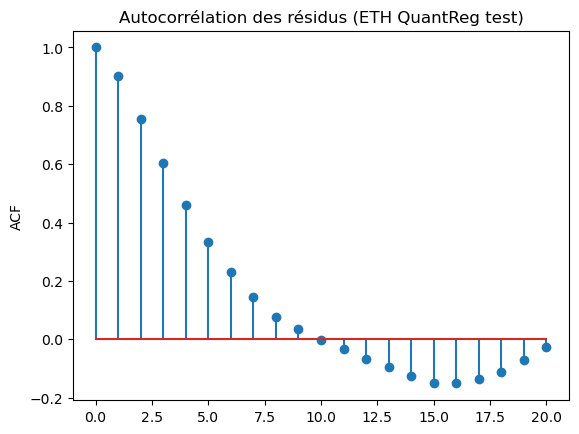

In [46]:
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# 1. Construct test features (same columns/order as pour l'entraînement)
X_test_eth_q = sm.add_constant(test_eth[selected_features_eth])

# 2. Predict with quantile regression (médiane ou autre quantile)
y_test_pred_eth = quant_reg_eth.predict(X_test_eth_q)
y_test_true_eth = test_eth['TARGET']

# 3. Calcul des résidus
residuals_eth_test = y_test_true_eth - y_test_pred_eth

# 4. Statistiques descriptives
print("Statistiques résidus QuantReg (ETH, test):")
print(residuals_eth_test.describe())

# 5. Durbin-Watson & test de normalité
dw = durbin_watson(residuals_eth_test)
print(f"Durbin-Watson: {dw:.3f}")

shapiro_stat, shapiro_p = shapiro(residuals_eth_test)
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

# 6. Autocorrélation (ACF plot)
acf_vals = acf(residuals_eth_test, nlags=20, fft=True)
plt.stem(acf_vals)
plt.title("Autocorrélation des résidus (ETH QuantReg test)")
plt.ylabel("ACF")
plt.show()


In [47]:

# 6. Evaluation quantitative
rmse = np.sqrt(mean_squared_error(y_test_true_eth, y_test_pred_eth))
r2 = r2_score(y_test_true_eth, y_test_pred_eth)
mape = np.mean(np.abs((y_test_true_eth - y_test_pred_eth) / y_test_true_eth)) * 100
print(f"Test RMSE (ETH QuantReg): {rmse:.2f}")
print(f"Test R² (ETH QuantReg): {r2:.4f}")
print(f"Test MAPE (ETH QuantReg): {mape:.2f}%")

# 7. Visualisation vrai vs. prédit (Plotly)
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_eth.index, y=y_test_true_eth, mode='lines', name='ETH True'))
fig.add_trace(go.Scatter(x=test_eth.index, y=y_test_pred_eth, mode='lines', name='ETH QuantReg Pred'))
fig.update_layout(
    title="Prévision Quantile Regression (ETH, test)",
    xaxis_title="Date",
    yaxis_title="Prix de clôture (USD)"
)
fig.show()

Test RMSE (ETH QuantReg): 210.96
Test R² (ETH QuantReg): 0.8858
Test MAPE (ETH QuantReg): 6.55%


In [48]:
import pickle

# Sauvegarde du modèle
with open("quant_reg_eth.pkl", "wb") as f:
    pickle.dump(quant_reg_eth, f)

# Sauvegarde des features utilisées
with open("selected_features_eth.pkl", "wb") as f:
    pickle.dump(selected_features_eth, f)


## modelisation LSTM

### BTC

In [49]:
btc_reg = btc_clean.copy()
btc_reg.index = pd.DatetimeIndex(btc_reg.index)
btc_reg = btc_reg.asfreq('D')  # S'assure d'une fréquence régulière daily
btc_reg['TARGET'] = btc_reg['Close_BTC-USD'].shift(-1)
# Retire les lignes incomplètes (en général la dernière)
btc_reg = btc_reg.dropna()


In [50]:
features = ['Z_RSI_14', 'Z_MACD_signal', 'Z_SMA_50', 'Z_SMA_200',
            'Z_RET_1D_BTC-USD', 'Z_VOLAT_14D_BTC-USD']
target = 'TARGET'


In [51]:
split = int(0.8 * len(btc_reg))
train = btc_reg.iloc[:split]
test = btc_reg.iloc[split:]


In [52]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(train[features])
y_train = scaler_y.fit_transform(train[[target]])
X_test = scaler_X.transform(test[features])
y_test = scaler_y.transform(test[[target]])


In [53]:
def create_sequences(X, y, seq_length=20):
    Xs, ys = [], []
    for i in range(seq_length, len(X)):
        Xs.append(X[i-seq_length:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

seq_length = 60
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)


In [54]:
import sys
print(sys.executable)


/opt/anaconda3/bin/python


In [55]:
from tensorflow import keras
from keras import layers
import keras_tuner as kt

def build_lstm_model(hp):
    model = keras.Sequential()
    # LSTM units
    units = hp.Int("units", min_value=32, max_value=128, step=32)
    model.add(layers.LSTM(units, return_sequences=True, input_shape=(seq_length, X_train_seq.shape[2])))
    # Dropout
    dropout = hp.Choice("dropout", values=[0.1, 0.2, 0.3])
    model.add(layers.Dropout(dropout))
    # Optional: second LSTM layer
    if hp.Boolean("second_layer"):
        model.add(layers.LSTM(units // 2))
        model.add(layers.Dropout(dropout))
    # Dense
    dense_units = hp.Choice("dense_units", [8, 16, 32])
    model.add(layers.Dense(dense_units, activation="relu"))
    model.add(layers.Dense(1))
    # Optimizer/LR
    lr = hp.Choice("learning_rate", [0.001, 0.0007, 0.0003])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss="mse")
    return model



2025-06-21 00:40:15.092624: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:


tuner = kt.RandomSearch(
    build_lstm_model,
    objective="val_loss",
    max_trials=15,        # Try 15 random combinations
    executions_per_trial=1, # Run each once (for speed)
    directory="lstm_tuning",
    project_name="crypto_lstm"
)


Reloading Tuner from lstm_tuning/crypto_lstm/tuner0.json


In [57]:
import numpy as np

def time_series_split(X, y, val_size=0.2):
    # last val_size% of data for validation, rest for training
    split_idx = int(len(X) * (1 - val_size))
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]
    return X_train, X_val, y_train, y_val

X_train_fold, X_val_fold, y_train_fold, y_val_fold = time_series_split(X_train_seq, y_train_seq)


In [58]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
tuner.search(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=50,               # Less is fine for tuning
    batch_size=32,
    callbacks=[es],
    verbose=2
)


In [59]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for k, v in best_hps.values.items():
    print(f"{k}: {v}")


Best hyperparameters:
units: 96
dropout: 0.3
second_layer: True
dense_units: 8
learning_rate: 0.0003


In [60]:
best_model = tuner.hypermodel.build(best_hps)

learning_rate = best_hps.get('learning_rate')
if learning_rate is None:
    learning_rate = 0.001  # fallback

best_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss="mse"
)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [61]:
history = best_model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=100,          # tu peux augmenter pour la “vraie” fit
    batch_size=32,
    callbacks=[es],
    verbose=2
)


Epoch 1/100
39/39 - 5s - 126ms/step - loss: 0.3778 - val_loss: 0.1390
Epoch 2/100
39/39 - 1s - 36ms/step - loss: 0.0833 - val_loss: 0.0976
Epoch 3/100
39/39 - 1s - 38ms/step - loss: 0.0505 - val_loss: 0.0632
Epoch 4/100
39/39 - 3s - 65ms/step - loss: 0.0414 - val_loss: 0.0511
Epoch 5/100
39/39 - 1s - 38ms/step - loss: 0.0337 - val_loss: 0.0479
Epoch 6/100
39/39 - 1s - 37ms/step - loss: 0.0342 - val_loss: 0.0601
Epoch 7/100
39/39 - 1s - 38ms/step - loss: 0.0310 - val_loss: 0.0606
Epoch 8/100
39/39 - 2s - 41ms/step - loss: 0.0308 - val_loss: 0.0342
Epoch 9/100
39/39 - 1s - 35ms/step - loss: 0.0274 - val_loss: 0.0489
Epoch 10/100
39/39 - 1s - 37ms/step - loss: 0.0305 - val_loss: 0.0247
Epoch 11/100
39/39 - 1s - 35ms/step - loss: 0.0256 - val_loss: 0.0300
Epoch 12/100
39/39 - 1s - 37ms/step - loss: 0.0265 - val_loss: 0.0254
Epoch 13/100
39/39 - 2s - 39ms/step - loss: 0.0266 - val_loss: 0.0327
Epoch 14/100
39/39 - 1s - 36ms/step - loss: 0.0255 - val_loss: 0.0340
Epoch 15/100
39/39 - 2s - 40

In [62]:
# Predict (output is scaled)
y_pred_scaled = best_model.predict(X_test_seq)

# Inverse transform to get original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

# Optional: flatten results if needed
y_pred = y_pred.flatten()
y_true = y_true.flatten()


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 21012.89
MAE: 18141.70


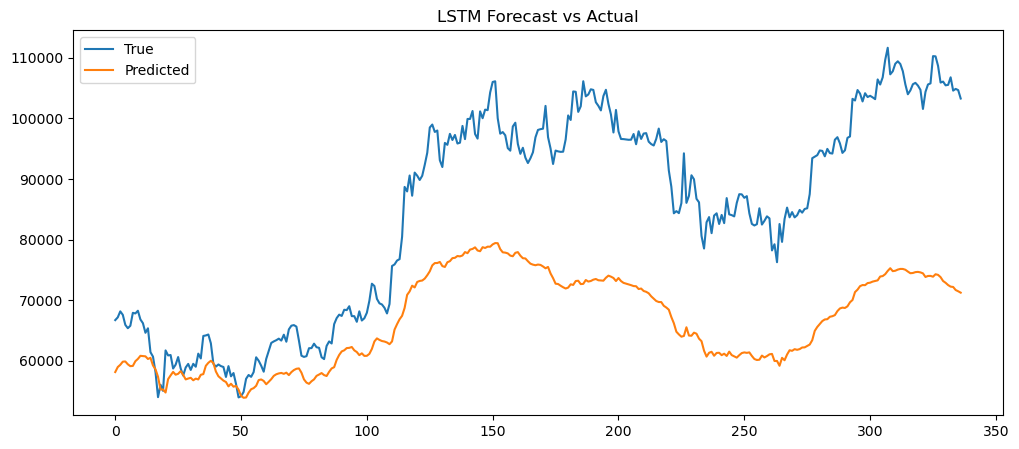

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_true, label='True')
plt.plot(y_pred, label='Predicted')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()


In [65]:
# Sauvegarder le modèle complet (architecture + poids + compile config)
import joblib
best_model.save("best_lstm_model.keras")
joblib.dump(scaler_y,"scaler_y_btc.save")
joblib.dump(scaler_X, "scaler_X_btc.save")

['scaler_X_btc.save']

### eth

In [66]:
eth_reg = eth_clean.copy()
eth_reg.index = pd.DatetimeIndex(eth_reg.index)
eth_reg = eth_reg.asfreq('D')  # Fréquence régulière daily
eth_reg['TARGET'] = eth_reg['Close_ETH-USD'].shift(-1)
eth_reg = eth_reg.dropna()


In [67]:
features = [
    'Z_RSI_14', 
    'Z_MACD_signal', 
    'Z_SMA_50', 
    'Z_SMA_200',
    'Z_RET_1D_ETH-USD', 
    'Z_VOLAT_14D_ETH-USD'
]
target = 'TARGET'


In [68]:
split = int(0.8 * len(eth_reg))
train = eth_reg.iloc[:split]
test = eth_reg.iloc[split:]


In [69]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(train[features])
y_train = scaler_y.fit_transform(train[[target]])
X_test = scaler_X.transform(test[features])
y_test = scaler_y.transform(test[[target]])


In [70]:
def create_sequences(X, y, seq_length=60):
    Xs, ys = [], []
    for i in range(seq_length, len(X)):
        Xs.append(X[i-seq_length:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

seq_length = 60
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)


In [71]:
from tensorflow import keras
from keras import layers
import keras_tuner as kt

def build_lstm_model(hp):
    model = keras.Sequential()
    # LSTM units
    units = hp.Int("units", min_value=32, max_value=128, step=32)
    model.add(layers.LSTM(units, return_sequences=True, input_shape=(seq_length, X_train_seq.shape[2])))
    # Dropout
    dropout = hp.Choice("dropout", values=[0.1, 0.2, 0.3])
    model.add(layers.Dropout(dropout))
    # Optional: second LSTM layer
    if hp.Boolean("second_layer"):
        model.add(layers.LSTM(units // 2))
        model.add(layers.Dropout(dropout))
    # Dense
    dense_units = hp.Choice("dense_units", [8, 16, 32])
    model.add(layers.Dense(dense_units, activation="relu"))
    model.add(layers.Dense(1))
    # Optimizer/LR
    lr = hp.Choice("learning_rate", [0.001, 0.0007, 0.0003])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss="mse")
    return model


In [72]:
tuner = kt.RandomSearch(
    build_lstm_model,
    objective="val_loss",
    max_trials=15,        # Try 15 random combinations
    executions_per_trial=1, # Run each once (for speed)
    directory="lstm_tuning",
    project_name="crypto_lstm"
)


Reloading Tuner from lstm_tuning/crypto_lstm/tuner0.json


In [73]:
import numpy as np

def time_series_split(X, y, val_size=0.2):
    # last val_size% of data for validation, rest for training
    split_idx = int(len(X) * (1 - val_size))
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]
    return X_train, X_val, y_train, y_val

X_train_fold, X_val_fold, y_train_fold, y_val_fold = time_series_split(X_train_seq, y_train_seq)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
tuner.search(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=50,               # Less is fine for tuning
    batch_size=32,
    callbacks=[es],
    verbose=2
)


In [74]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for k, v in best_hps.values.items():
    print(f"{k}: {v}")

Best hyperparameters:
units: 96
dropout: 0.3
second_layer: True
dense_units: 8
learning_rate: 0.0003


In [75]:
best_model = tuner.hypermodel.build(best_hps)

learning_rate = best_hps.get('learning_rate')
if learning_rate is None:
    learning_rate = 0.001  # fallback

best_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss="mse"
)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [76]:
history = best_model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=100,          # tu peux augmenter pour la “vraie” fit
    batch_size=32,
    callbacks=[es],
    verbose=2
)

Epoch 1/100
39/39 - 5s - 130ms/step - loss: 0.3830 - val_loss: 0.0546
Epoch 2/100
39/39 - 1s - 36ms/step - loss: 0.0826 - val_loss: 0.0181
Epoch 3/100
39/39 - 2s - 41ms/step - loss: 0.0554 - val_loss: 0.0141
Epoch 4/100
39/39 - 1s - 37ms/step - loss: 0.0457 - val_loss: 0.0111
Epoch 5/100
39/39 - 2s - 39ms/step - loss: 0.0398 - val_loss: 0.0122
Epoch 6/100
39/39 - 1s - 37ms/step - loss: 0.0377 - val_loss: 0.0087
Epoch 7/100
39/39 - 2s - 40ms/step - loss: 0.0393 - val_loss: 0.0102
Epoch 8/100
39/39 - 2s - 41ms/step - loss: 0.0370 - val_loss: 0.0092
Epoch 9/100
39/39 - 2s - 39ms/step - loss: 0.0340 - val_loss: 0.0081
Epoch 10/100
39/39 - 2s - 41ms/step - loss: 0.0309 - val_loss: 0.0167
Epoch 11/100
39/39 - 2s - 44ms/step - loss: 0.0311 - val_loss: 0.0097
Epoch 12/100
39/39 - 2s - 45ms/step - loss: 0.0321 - val_loss: 0.0075
Epoch 13/100
39/39 - 2s - 49ms/step - loss: 0.0296 - val_loss: 0.0121
Epoch 14/100
39/39 - 2s - 52ms/step - loss: 0.0278 - val_loss: 0.0087
Epoch 15/100
39/39 - 2s - 49

In [77]:
# Predict (output is scaled)
y_pred_scaled = best_model.predict(X_test_seq)

# Inverse transform to get original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

# Optional: flatten results if needed
y_pred = y_pred.flatten()
y_true = y_true.flatten()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 122.34
MAE: 93.11


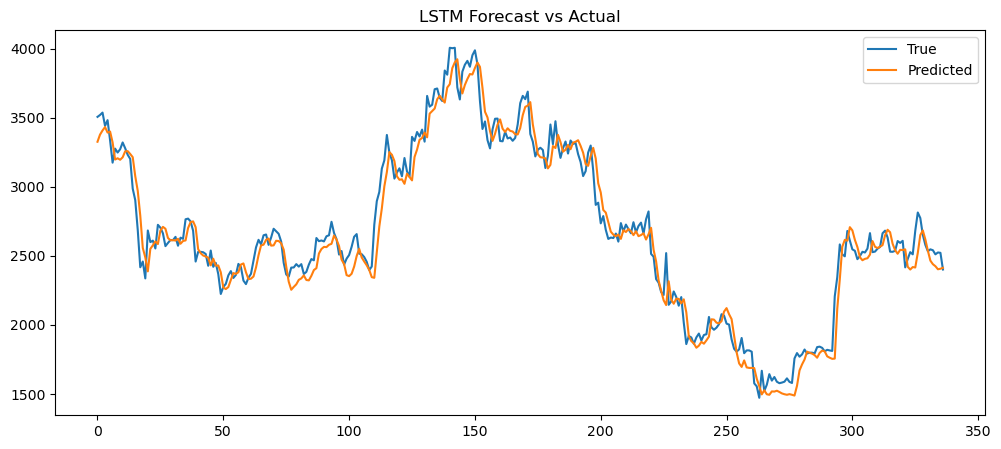

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_true, label='True')
plt.plot(y_pred, label='Predicted')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()

In [80]:
# Sauvegarder le modèle complet (architecture + poids + compile config)
import joblib

best_model.save("best_lstm_eth.keras")
joblib.dump(scaler_y, "scaler_y_eth.save")
joblib.dump(scaler_X,"scaler_X_eth.save")

['scaler_X_eth.save']